In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [87]:
#Read and Load Dataset
student = pd.read_csv(r"C:\Users\gyenw\Downloads\finaleproject.csv", index_col=0)
student
#student.head(20)

,gender,age,major,gpa,SoloFounder,UniversityInCity,HasMentor,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,StartedBusiness
id,,,,,,,,,,,,,,,
1,Polygender,17,Social Sciences,3.00,Yes,No,Yes,5.0,5.0,3.0,5.0,5.0,3.0,2.0,Yes
2,Bigender,17,Business,2.05,No,No,Yes,5.0,2.0,5.0,5.0,5.0,5.0,5.0,No
3,Male,21,Social Sciences,2.54,No,No,Yes,4.0,4.0,3.0,3.0,4.0,5.0,4.0,Yes
4,Female,21,History,2.06,No,No,Yes,3.0,1.0,3.0,3.0,2.0,5.0,4.0,No
5,Male,23,Business,2.23,No,Yes,Yes,4.0,2.0,2.0,3.0,4.0,1.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24996,Female,21,Life Sciences,2.86,No,Yes,Yes,5.0,4.0,2.0,3.0,1.0,5.0,2.0,No
24997,Female,22,Arts,1.89,Yes,Yes,Yes,4.0,3.0,1.0,5.0,5.0,1.0,3.0,No
24998,Genderqueer,23,Life Sciences,3.20,No,No,No,5.0,3.0,4.0,2.0,4.0,3.0,3.0,Yes


In [88]:
student.describe()

,age,gpa,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth
count,25000.00000,25000.000000,24505.000000,24505.000000,24505.000000,24505.000000,24505.000000,24505.000000,24505.000000
mean,19.98984,2.898711,3.528504,3.009304,2.994654,3.003918,2.993389,2.987145,2.978780
std,2.00419,0.635424,1.223617,1.412017,1.409159,1.412938,1.414919,1.417110,1.409863
min,17.00000,1.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,18.00000,2.350000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,20.00000,2.900000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,22.00000,3.450000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,23.00000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [155]:
#Calculate the mean for a selected categories: age, GPA, students with desire to take initiative, perseverance and competitiveness
ageMean = np.mean(student['age'])
gpaMean = np.mean(student['gpa'])
initiativeMean = np.mean(student['DesireToTakeInitiative'])
persevereMean = np.mean(student['Perseverance'])
competeMean = np.mean(student['Competitiveness'])

print("Mean for age: ", ageMean)
print("Mean for gpa: ", gpaMean)
print("Mean for DesireToTakeInitiative: ", initiativeMean)
print("Mean for Perseverance: ", persevereMean)
print("Mean for Competitiveness: ", competeMean)

Mean for age:  19.98984
Mean for gpa:  2.8987112
Mean for DesireToTakeInitiative:  3.009304223627831
Mean for Perseverance:  3.5285043868598245
Mean for Competitiveness:  2.994654152213834


In [156]:
#Calculate the median for a selected categories: age, GPA, students with desire to take initiative, perseverance and competitiveness
ageMedian = np.median(student['age'])
gpaMedian = np.median(student['gpa'])
initiativeMedian = np.median(student['DesireToTakeInitiative'])
persevereMedian = np.median(student['Perseverance'])
competeMedian = np.median(student['Competitiveness'])

print("Median for age: ", ageMedian)
print("Median for gpa: ", gpaMedian)
print("Median for DesireToTakeInitiative: ", initiativeMedian)
print("Median for Perseverance: ", persevereMedian)
print("Median for Competitiveness: ", competeMedian)

Median for age:  20.0
Median for gpa:  2.9
Median for DesireToTakeInitiative:  nan
Median for Perseverance:  nan
Median for Competitiveness:  nan


In [157]:
#Calculate the std dev for a selected categories: age, GPA, students with desire to take initiative, perseverance and competitiveness
ageStd = np.std(student['age'])
gpaStd = np.std(student['gpa'])
initiativeStd = np.std(student['DesireToTakeInitiative'])
persevereStd = np.std(student['Perseverance'])
competeStd = np.std(student['Competitiveness'])

print("Standard Deviation for age: ", ageMean)
print("Standard Deviation for gpa: ", gpaMean)
print("Standard Deviation for DesireToTakeInitiative: ", initiativeStd)
print("Standard Deviation for Perseverance: ", persevereStd)
print("Standard Deviation for Competitiveness: ", competeStd)

Standard Deviation for age:  19.98984
Standard Deviation for gpa:  2.8987112
Standard Deviation for DesireToTakeInitiative:  1.4119881783042298
Standard Deviation for Perseverance:  1.223592132211477
Standard Deviation for Competitiveness:  1.4091301623641836


<Axes: xlabel='major', ylabel='count'>

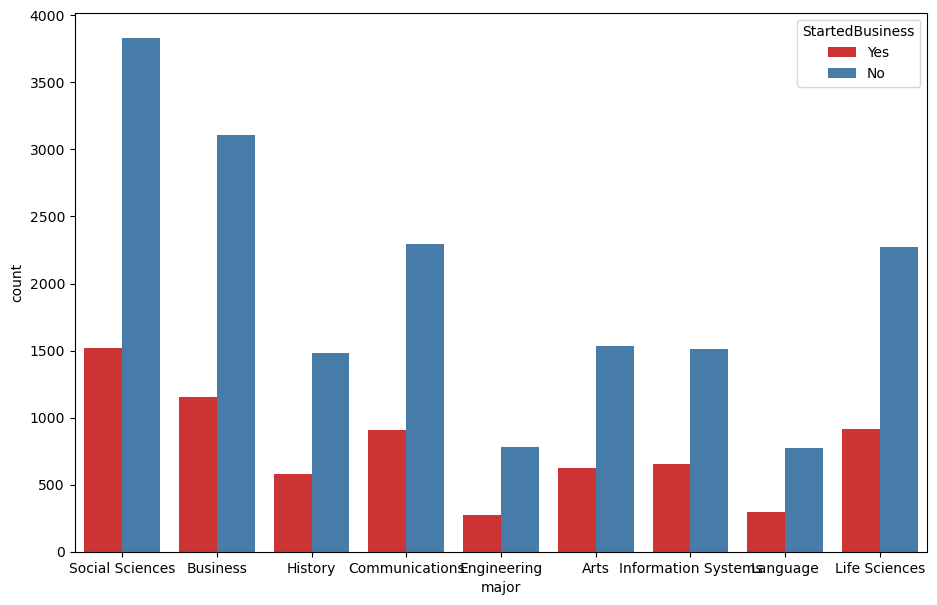

In [158]:
#Visualize data with seaborn count plot displaying correlation between majors and likelihood of starting a business
plt.figure(figsize=(11,7))
sns.countplot(x='major', hue='StartedBusiness', data=student, palette='Set1')

#This histogram tells us that majority of student enterprenuers regardless of their do not start their own business

<Axes: xlabel='HasMentor', ylabel='count'>

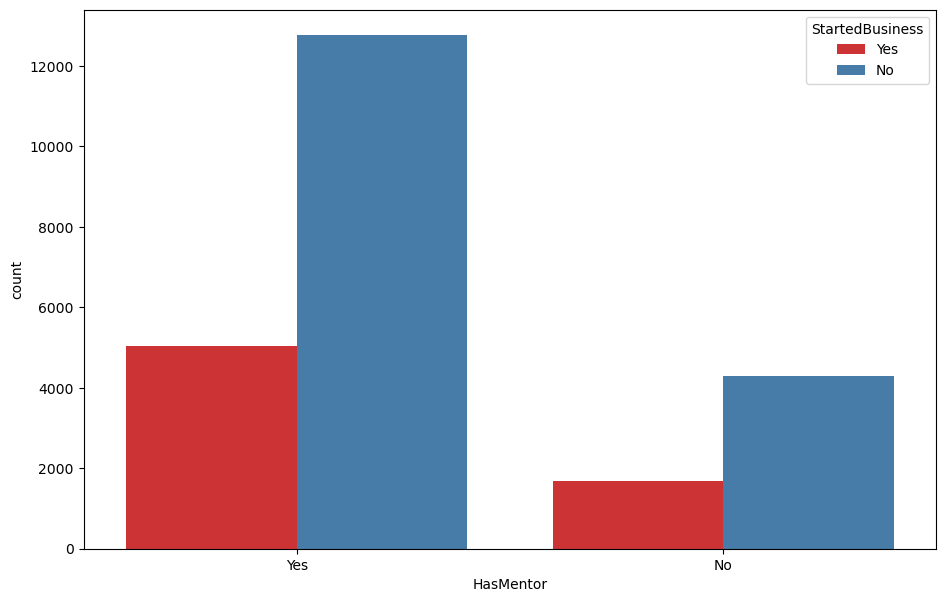

In [159]:
#Visualize data with seaborn count plot displaying correlation between majors and likelihood of starting a business
plt.figure(figsize=(11,7))
sns.countplot(x='HasMentor', hue='StartedBusiness', data=student, palette='Set1')

#This histogram shows that student enterpreneurs who have a mentor are more likely to start a business

In [160]:
# Drop rows with missing values in student dataset
updated_Student = student.dropna(subset=['SoloFounder', 'UniversityInCity', 'HasMentor', 'Perseverance', 'DesireToTakeInitiative', 'Competitiveness', 'SelfReliance', 'StrongNeedToAchieve', 'SelfConfidence', 'GoodPhysicalHealth', 'StartedBusiness'])

#Display the cleaned dataset
updated_Student.head(10)

,gender,age,major,gpa,SoloFounder,UniversityInCity,HasMentor,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,StartedBusiness
id,,,,,,,,,,,,,,,
1,Polygender,17,Social Sciences,3.00,Yes,No,Yes,5.0,5.0,3.0,5.0,5.0,3.0,2.0,Yes
2,Bigender,17,Business,2.05,No,No,Yes,5.0,2.0,5.0,5.0,5.0,5.0,5.0,No
3,Male,21,Social Sciences,2.54,No,No,Yes,4.0,4.0,3.0,3.0,4.0,5.0,4.0,Yes
4,Female,21,History,2.06,No,No,Yes,3.0,1.0,3.0,3.0,2.0,5.0,4.0,No
5,Male,23,Business,2.23,No,Yes,Yes,4.0,2.0,2.0,3.0,4.0,1.0,1.0,No
6,Female,20,Communications,3.23,No,Yes,Yes,2.0,3.0,4.0,1.0,3.0,5.0,1.0,Yes
7,Female,19,Communications,3.32,No,Yes,Yes,1.0,5.0,5.0,4.0,1.0,3.0,1.0,No
8,Female,22,Social Sciences,2.33,No,Yes,Yes,5.0,2.0,5.0,3.0,4.0,5.0,5.0,No
9,Male,22,Engineering,2.59,Yes,No,No,4.0,3.0,3.0,5.0,4.0,1.0,3.0,No


<Axes: xlabel='SelfConfidence', ylabel='count'>

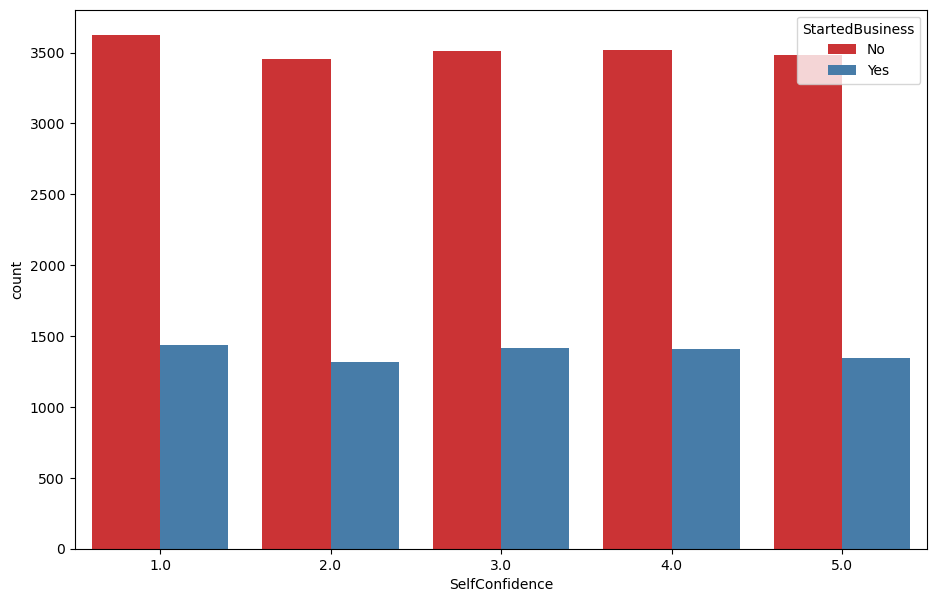

In [162]:
#Visualize data with seaborn count plot displaying correlation between majors and likelihood of starting a business
plt.figure(figsize=(11,7))
sns.countplot(x='SelfConfidence', hue='StartedBusiness', data=student, palette='Set1')


In [163]:
#Determine missing values
print(student.isnull().sum())

gender                       0
age                          0
major                        0
gpa                          0
SoloFounder               1013
UniversityInCity           495
HasMentor                  731
Perseverance               495
DesireToTakeInitiative     495
Competitiveness            495
SelfReliance               495
StrongNeedToAchieve        495
SelfConfidence             495
GoodPhysicalHealth         495
StartedBusiness            495
dtype: int64


In [164]:
#Dummy code all the categorical data
categorical_columns = ['gender', 'major','SoloFounder', 'UniversityInCity', 'HasMentor', 'StartedBusiness']
student_dummies = pd.get_dummies(student, columns=categorical_columns, drop_first=True, dtype=int)
student_dummies.head(10)

,age,gpa,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,gender_Bigender,...,major_Engineering,major_History,major_Information Systems,major_Language,major_Life Sciences,major_Social Sciences,SoloFounder_Yes,UniversityInCity_Yes,HasMentor_Yes,StartedBusiness_Yes
id,,,,,,,,,,,,,,,,,,,,,
1,17,3.00,5.0,5.0,3.0,5.0,5.0,3.0,2.0,0,...,0,0,0,0,0,1,1,0,1,1
2,17,2.05,5.0,2.0,5.0,5.0,5.0,5.0,5.0,1,...,0,0,0,0,0,0,0,0,1,0
3,21,2.54,4.0,4.0,3.0,3.0,4.0,5.0,4.0,0,...,0,0,0,0,0,1,0,0,1,1
4,21,2.06,3.0,1.0,3.0,3.0,2.0,5.0,4.0,0,...,0,1,0,0,0,0,0,0,1,0
5,23,2.23,4.0,2.0,2.0,3.0,4.0,1.0,1.0,0,...,0,0,0,0,0,0,0,1,1,0
6,20,3.23,2.0,3.0,4.0,1.0,3.0,5.0,1.0,0,...,0,0,0,0,0,0,0,1,1,1
7,19,3.32,1.0,5.0,5.0,4.0,1.0,3.0,1.0,0,...,0,0,0,0,0,0,0,1,1,0
8,22,2.33,5.0,2.0,5.0,3.0,4.0,5.0,5.0,0,...,0,0,0,0,0,1,0,1,1,0
9,22,2.59,4.0,3.0,3.0,5.0,4.0,1.0,3.0,0,...,1,0,0,0,0,0,1,0,0,0


Explained variance by component:  [0.11564337 0.11344622]


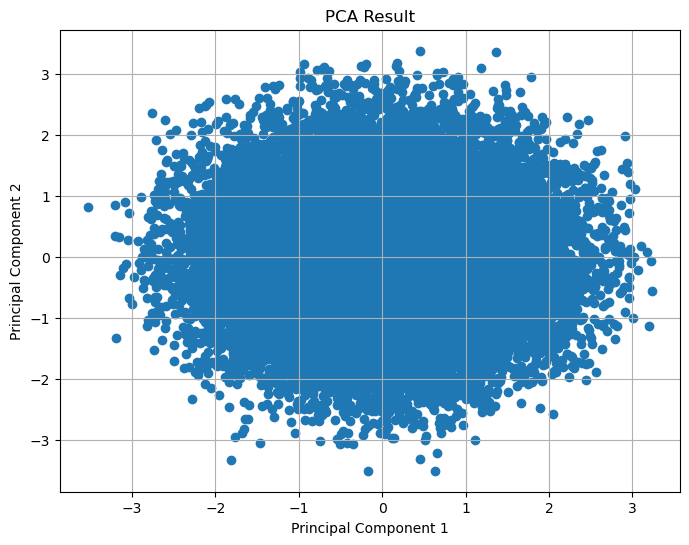

In [166]:
#Principle Component Analysis on the dataset

numeric_student = student.select_dtypes(include=[np.number])

numeric_student = numeric_student.dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_student)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

pca_student = pd.DataFrame(data=pca_result, columns=["PCA 1", "PCA 2"])

explained_variance = pca.explained_variance_ratio_
print('Explained variance by component: ',explained_variance)

plt.figure(figsize=(8, 6))
plt.scatter(pca_student['PCA 1'], pca_student['PCA 2'])
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [167]:
#Drop rows where target is missing first
student_clean = student.dropna(subset=['StartedBusiness'])

df_yes = student_clean[student_clean['StartedBusiness'] == 'Yes'] #minority class
df_no = student_clean[student_clean['StartedBusiness'] == 'No'] #majority class

# DOWNSAMPLE the 'No' class
# We randomly pick a subset of 'No' students exactly equal to the number of 'Yes' students
# This forces the model to treat both outcomes as equally probable/important
df_no_downsampled = df_no.sample(n=len(df_yes), random_state=42)

# Combine the minority class with the downsampled majority class
# Now we have a perfectly balanced 50/50 dataset
student_balanced = pd.concat([df_yes, df_no_downsampled])


In [168]:
#Now define X and y using this new balanced dataframe
y = student_balanced['StartedBusiness']
X = student_balanced.drop(columns=['StartedBusiness'])

#Separate columns by type
numeric_cols = ["age", "Perseverance", "DesireToTakeInitiative", "Competitiveness", "SelfReliance", "StrongNeedToAchieve", "GoodPhysicalHealth"]
categorical_cols = ["gender", "major", "SoloFounder", "UniversityInCity", "HasMentor"]

#Impute numbers with 'mean' 
imputer_num = SimpleImputer(strategy='mean')
X_num = pd.DataFrame(imputer_num.fit_transform(X[numeric_cols]), columns=numeric_cols, index=X.index)

#Impute categorical values with mode
imputer_cat = SimpleImputer(strategy='most_frequent')
X_cat = pd.DataFrame(imputer_cat.fit_transform(X[categorical_cols]), columns=categorical_cols, index=X.index)

In [169]:
#Combine and ENCODE
X_combined = pd.concat([X_num, X_cat], axis=1)
print(X_combined)

#Dummy code the categorical data
X_encoded = pd.get_dummies(X_combined, columns=categorical_cols, drop_first=True)

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

        age  Perseverance  DesireToTakeInitiative  Competitiveness  \
id                                                                   
1      17.0           5.0                     5.0              3.0   
3      21.0           4.0                     4.0              3.0   
6      20.0           2.0                     3.0              4.0   
12     19.0           5.0                     4.0              4.0   
13     20.0           4.0                     4.0              1.0   
...     ...           ...                     ...              ...   
3388   21.0           4.0                     3.0              4.0   
17225  20.0           2.0                     1.0              4.0   
21003  19.0           5.0                     3.0              3.0   
18044  17.0           5.0                     3.0              2.0   
16641  23.0           3.0                     4.0              5.0   

       SelfReliance  StrongNeedToAchieve  GoodPhysicalHealth      gender  \
id           

In [170]:
clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [171]:
#Predictions and Evaluations of Decision Tree
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.50      0.51      0.51      2068
         Yes       0.51      0.50      0.50      2084

    accuracy                           0.50      4152
   macro avg       0.50      0.50      0.50      4152
weighted avg       0.50      0.50      0.50      4152



In [172]:
print(confusion_matrix(y_test, predictions))

[[1049 1019]
 [1037 1047]]


In [173]:
#Also use a Random Forest Model
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, predictions))

Random Forest Results:
              precision    recall  f1-score   support

          No       0.51      0.54      0.52      2068
         Yes       0.51      0.48      0.50      2084

    accuracy                           0.51      4152
   macro avg       0.51      0.51      0.51      4152
weighted avg       0.51      0.51      0.51      4152



In [174]:
print(confusion_matrix(y_test, predictions))

[[1108  960]
 [1081 1003]]


In [175]:
importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(importance.head(10))


Top 10 Most Important Features:
                   Feature  Importance
0                      age    0.132319
1             Perseverance    0.117634
5      StrongNeedToAchieve    0.110392
6       GoodPhysicalHealth    0.102378
4             SelfReliance    0.077486
2   DesireToTakeInitiative    0.075272
3          Competitiveness    0.065838
24           HasMentor_Yes    0.037421
22         SoloFounder_Yes    0.036004
21   major_Social Sciences    0.034493


In [ ]:
#To ensure the validity of our predictive model, we addressed the significant class imbalance (5,301 Non-Founders vs. 2,051 Founders) 
#by downsampling the majority class to create a balanced dataset. This forced the model to rely solely on feature patterns 
#rather than class frequency to make predictions. Under these controlled conditions, the Random Forest model converged 
#on an accuracy of 50%, effectively performing no better than random chance. This indicates that the features provided—specifically 
#Academic Performance (GPA, Major) and Psychometric Traits (Self-Reliance, Risk-Taking) possess no predictive power regarding a student's likelihood 
#of starting a business. We can conclude that for this population, entrepreneurship is not driven by the internal traits measured in this survey, 
#debunking the hypothesis that there is a specific "entrepreneurial personality type" or "ideal major" for founders